In [1]:
import pandas as pd

total_acco_pct_df = pd.read_csv('./data/total_acc_pct_df.csv')
total_acco_pct_df.head()

,날짜,전국_숙박/음식,전국_숙박,전국_음식점,전국_숙박/음식_등락률,전국_숙박_등락률,전국_음식점_등락률,계절
0,201212,37410.08,2454.51,34955.56,0.122832,0.157793,0.120456,2012 겨울
1,201301,34309.86,2458.03,31851.83,-0.082871,0.001434,-0.088791,2013 겨울
2,201302,28779.93,1821.75,26958.18,-0.161176,-0.258858,-0.153638,2013 겨울
3,201303,34196.47,1898.21,32298.26,0.188205,0.041971,0.198088,2013 봄
4,201304,34267.13,1913.54,32353.58,0.002066,0.008076,0.001713,2013 봄


In [54]:
consump_sale_df = pd.read_csv('./data/소매판매지수_1211_2204.csv')
consump_sale_df = consump_sale_df.iloc[:-2]

In [55]:
consump_sale_df["불변_총지수_등락률"] = consump_sale_df["불변_총지수"].pct_change()
consump_sale_df["계절_총지수_등락률"] = consump_sale_df["계절_총지수"].pct_change()
consump_sale_df.tail()

,날짜,불변_총지수,불변_총지수(승용차제외),불변_내구재,불변_준내구재,불변_비내구재,계절_총지수,계절_총지수(승용차제외),계절_내구재,계절_준내구재,계절_비내구재,불변_인터넷쇼핑,불변_홈쇼핑,불변_방문및배달소매점,불변_총지수_등락률,계절_총지수_등락률
107,2021-10,125.0,125.6,137.5,129.4,117.2,121.3,121.4,139.0,111.4,117.5,340.8,137.0,70.0,0.018745,0.000000
108,2021-11,124.7,124.2,139.6,127.4,116.6,120.5,120.4,134.7,111.8,117.7,354.2,138.8,69.6,-0.002400,-0.006595
109,2021-12,127.2,125.2,146.5,118.8,121.9,123.2,122.7,138.9,112.0,120.8,370.3,139.1,68.1,0.020048,0.022407
110,2022-01,117.5,119.7,120.6,98.5,124.5,120.7,121.1,131.4,108.0,121.3,322.5,133.8,77.0,-0.076258,-0.020292
111,2022-02,107.9,107.1,130.1,88.5,106.0,120.7,119.3,143.7,107.4,115.9,307.4,122.1,63.8,-0.081702,0.000000


In [56]:
consump_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   날짜             112 non-null    object 
 1   불변_총지수         112 non-null    float64
 2   불변_총지수(승용차제외)  112 non-null    float64
 3   불변_내구재         112 non-null    float64
 4   불변_준내구재        112 non-null    float64
 5   불변_비내구재        112 non-null    float64
 6   계절_총지수         112 non-null    float64
 7   계절_총지수(승용차제외)  112 non-null    float64
 8   계절_내구재         112 non-null    float64
 9   계절_준내구재        112 non-null    float64
 10  계절_비내구재        112 non-null    float64
 11  불변_인터넷쇼핑       112 non-null    float64
 12  불변_홈쇼핑         112 non-null    float64
 13  불변_방문및배달소매점    112 non-null    float64
 14  불변_총지수_등락률     111 non-null    float64
 15  계절_총지수_등락률     111 non-null    float64
dtypes: float64(15), object(1)
memory usage: 14.1+ KB


In [57]:
consump_sale_df = consump_sale_df[["날짜", "불변_총지수", "계절_총지수", "불변_총지수_등락률", "계절_총지수_등락률"]]
consump_sale_df = consump_sale_df.loc[1:]
consump_sale_df.head(2)

,날짜,불변_총지수,계절_총지수,불변_총지수_등락률,계절_총지수_등락률
1,2012-12,99.8,95.0,0.023590,0.004228
2,2013-01,91.2,94.4,-0.086172,-0.006316


In [58]:
consump_sale_df["날짜"] = pd.to_datetime(consump_sale_df["날짜"], format='%Y-%m')
consump_sale_df["날짜"] = consump_sale_df["날짜"].dt.strftime('%Y%m')
consump_sale_df.set_index("날짜", inplace=True)

In [59]:
total_acco_pct_df.columns

Index(['날짜', '전국_숙박/음식', '전국_숙박', '전국_음식점', '전국_숙박/음식_등락률', '전국_숙박_등락률',
       '전국_음식점_등락률', '계절', '불변_총지수', '계절_총지수'],
      dtype='object')

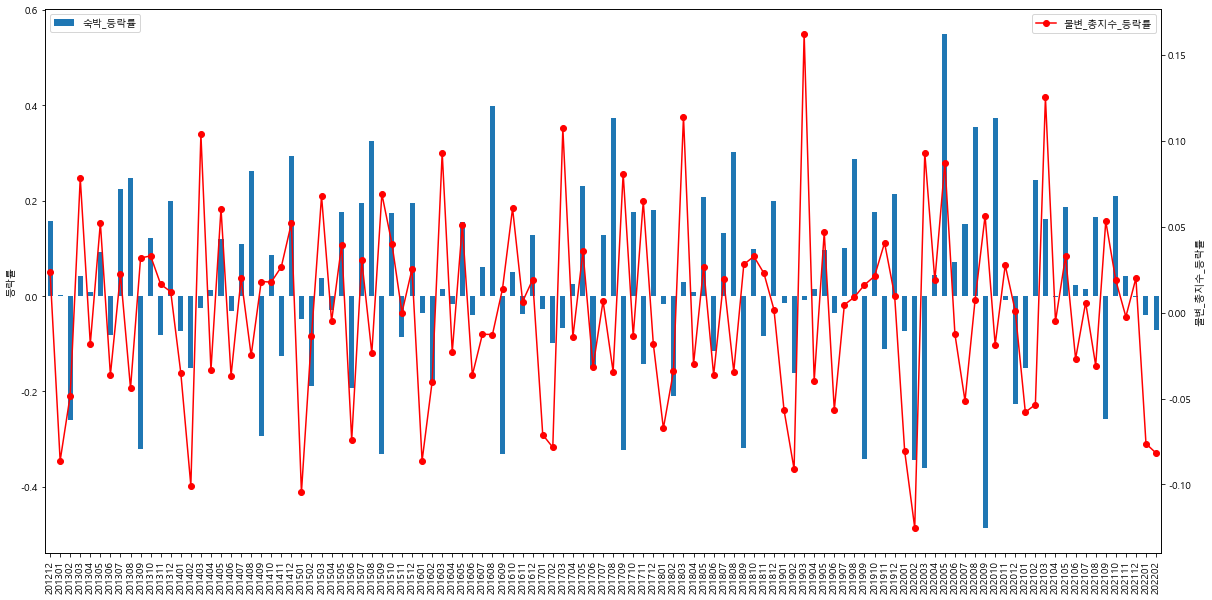

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

fig, ax1 = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)

total_acco_pct_df['전국_숙박_등락률'].plot(kind='bar', label="숙박_등락률", ax=ax1)
ax1.set_ylabel("등락률")
plt.legend(loc="upper left")

ax2 = ax1.twinx()
consump_sale_df['불변_총지수_등락률'].plot(kind='line', marker='o' , color="r", label="불변_총지수_등락률", ax=ax2) 
ax2.set_ylabel('불변_총지수_등락률')

plt.legend(loc="upper right")  
plt.show()

<AxesSubplot:>

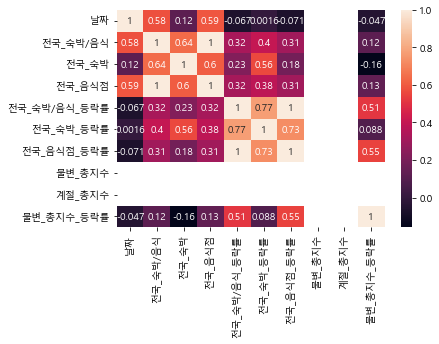

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

sns.heatmap(a_df.corr(), annot=True)

<AxesSubplot:>

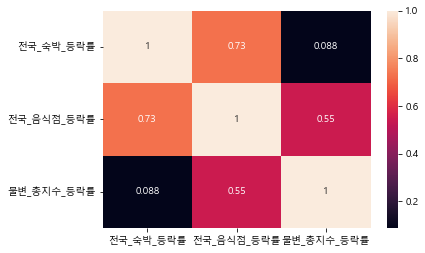

In [73]:
sns.heatmap(a_df[["전국_숙박_등락률", "전국_음식점_등락률", "불변_총지수_등락률"]].corr(), annot=True)

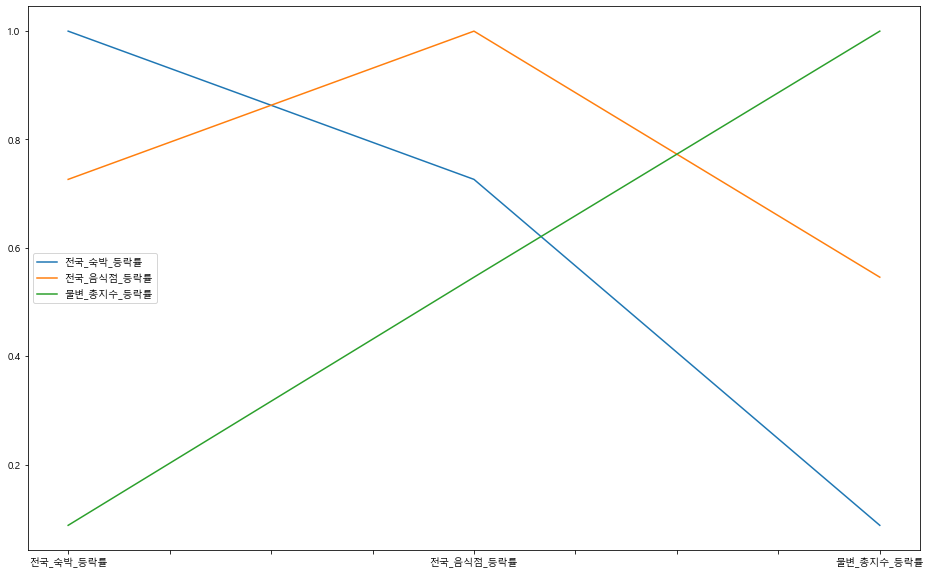

In [77]:
a_df[["전국_숙박_등락률", "전국_음식점_등락률", "불변_총지수_등락률"]].corr().plot(figsize=(16,10))
plt.show()

In [68]:
pct_list = consump_sale_df["불변_총지수_등락률"].tolist()
pct_list

[0.02358974358974364,
 -0.08617234468937873,
 -0.04824561403508776,
 0.07834101382488479,
 -0.018162393162392987,
 0.052230685527747456,
 -0.03619441571871773,
 0.02253218884120156,
 -0.044071353620146914,
 0.03183315038419332,
 0.03297872340425534,
 0.016477857878475888,
 0.012158054711246313,
 -0.03503503503503502,
 -0.10062240663900412,
 0.10380622837370246,
 -0.03343782654127481,
 0.06054054054054059,
 -0.03669724770642191,
 0.020105820105820182,
 -0.024896265560165998,
 0.018085106382978777,
 0.017763845350052376,
 0.026694045174537884,
 0.052000000000000046,
 -0.1045627376425855,
 -0.013800424628450103,
 0.06781485468245418,
 -0.005040322580645129,
 0.03951367781155013,
 -0.07407407407407407,
 0.030526315789473735,
 -0.023493360572012345,
 0.06903765690376584,
 0.04011741682974557,
 0.0,
 0.02539981185324547,
 -0.0862385321100918,
 -0.04016064257028118,
 0.09309623430962355,
 -0.022966507177033524,
 0.050930460333006966,
 -0.03634669151910519,
 -0.012572533849129708,
 -0.01273261

In [69]:
a_df = total_acco_pct_df.copy()
a_df["불변_총지수_등락률"] = pct_list
a_df.head()

,날짜,전국_숙박/음식,전국_숙박,전국_음식점,전국_숙박/음식_등락률,전국_숙박_등락률,전국_음식점_등락률,계절,불변_총지수,계절_총지수,불변_총지수_등락률
0,201212,37410.08,2454.51,34955.56,0.122832,0.157793,0.120456,2012 겨울,NaN,NaN,0.023590
1,201301,34309.86,2458.03,31851.83,-0.082871,0.001434,-0.088791,2013 겨울,NaN,NaN,-0.086172
2,201302,28779.93,1821.75,26958.18,-0.161176,-0.258858,-0.153638,2013 겨울,NaN,NaN,-0.048246
3,201303,34196.47,1898.21,32298.26,0.188205,0.041971,0.198088,2013 봄,NaN,NaN,0.078341
4,201304,34267.13,1913.54,32353.58,0.002066,0.008076,0.001713,2013 봄,NaN,NaN,-0.018162
